In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Загрязнение воздуха - сочетание твердых частиц на открытом воздухе и внутри помещений и озона - является фактором риска для многих ведущих причин смерти, включая болезни сердца, инсульт, инфекции нижних дыхательных путей, рак легких, диабет и хроническую обструктивную болезнь легких (ХОБЛ).

Задача классификации 

In [ ]:
df = pd.read_csv('/content/air-pollution.csv')

In [ ]:
df=df[df['Year']>1950]
df = df[(df["Country"] == 'Afghanistan') | (df["Country"] == 'Zimbabwe')]
df.head()

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
156,Afghanistan,1951,22543.15,798.25,420386.77,15181.04,35130.32,4577.78,36392.72
157,Afghanistan,1952,21627.07,808.01,397146.98,15248.12,33781.44,4596.74,36974.06
158,Afghanistan,1953,22802.86,852.10,378114.13,15310.15,34532.97,4615.94,37591.01
159,Afghanistan,1954,22913.53,877.14,356587.85,15367.04,34223.80,4632.69,38072.12
160,Afghanistan,1955,30384.85,1077.10,351366.49,15427.54,41376.50,4657.80,38407.29


In [ ]:
df.shape

(138, 9)

In [ ]:
df['Country'].unique().shape

(2,)

In [ ]:
df.dtypes

Country             object
Year                 int64
Nitrogen Oxide     float64
Sulphur Dioxide    float64
Carbon Monoxide    float64
Organic Carbon     float64
NMVOCs             float64
Black Carbon       float64
Ammonia            float64
dtype: object

In [ ]:
df.isnull().sum()

Country            0
Year               0
Nitrogen Oxide     0
Sulphur Dioxide    0
Carbon Monoxide    0
Organic Carbon     0
NMVOCs             0
Black Carbon       0
Ammonia            0
dtype: int64

(array([14., 14., 14., 14., 12., 14., 14., 14., 14., 14.]),
 array([1951. , 1957.8, 1964.6, 1971.4, 1978.2, 1985. , 1991.8, 1998.6,
        2005.4, 2012.2, 2019. ]),
 <a list of 10 Patch objects>)

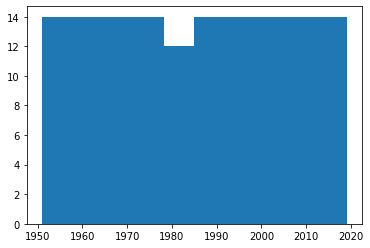

In [ ]:
plt.hist(df['Year'])

(array([1.5378e+04, 1.5800e+02, 1.7500e+02, 4.1000e+01, 5.1000e+01,
        1.7000e+01, 6.0000e+00, 9.0000e+00, 1.9000e+01, 1.6000e+01]),
 array([0.00000000e+00, 1.09566318e+07, 2.19132637e+07, 3.28698955e+07,
        4.38265273e+07, 5.47831591e+07, 6.57397910e+07, 7.66964228e+07,
        8.76530546e+07, 9.86096865e+07, 1.09566318e+08]),
 <a list of 10 Patch objects>)

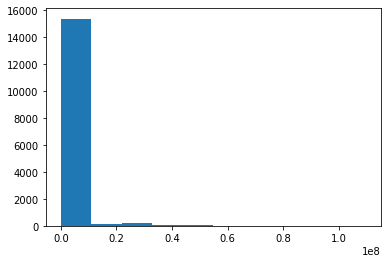

In [ ]:
plt.hist(df['Nitrogen Oxide'])

(array([1.5361e+04, 1.9900e+02, 9.5000e+01, 8.5000e+01, 4.9000e+01,
        2.5000e+01, 7.0000e+00, 1.7000e+01, 1.3000e+01, 1.9000e+01]),
 array([0.00000000e+00, 1.33526347e+07, 2.67052693e+07, 4.00579040e+07,
        5.34105387e+07, 6.67631734e+07, 8.01158080e+07, 9.34684427e+07,
        1.06821077e+08, 1.20173712e+08, 1.33526347e+08]),
 <a list of 10 Patch objects>)

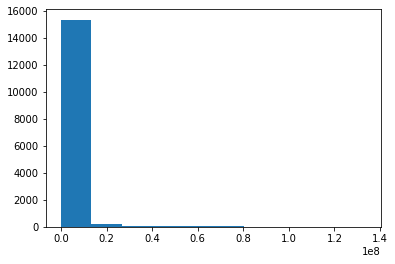

In [ ]:
plt.hist(df['Sulphur Dioxide'])

(array([1.53e+04, 2.08e+02, 1.54e+02, 7.00e+01, 5.00e+01, 3.00e+01,
        6.00e+00, 5.00e+00, 1.90e+01, 2.80e+01]),
 array([0.00000000e+00, 6.61623619e+07, 1.32324724e+08, 1.98487086e+08,
        2.64649447e+08, 3.30811809e+08, 3.96974171e+08, 4.63136533e+08,
        5.29298895e+08, 5.95461257e+08, 6.61623618e+08]),
 <a list of 10 Patch objects>)

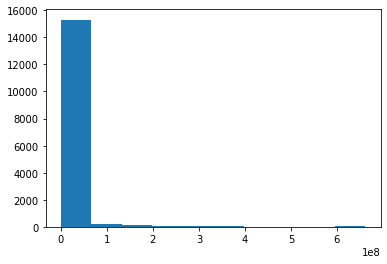

In [ ]:
plt.hist(df['Carbon Monoxide'])

In [ ]:
df.corr()

,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
Year,1.000000,0.376762,0.345842,0.657211,0.614047,0.668677,0.630875,0.935741
Nitrogen Oxide,0.376762,1.000000,-0.045331,0.019289,-0.332399,0.652104,-0.288572,0.505851
Sulphur Dioxide,0.345842,-0.045331,1.000000,0.581777,0.522078,0.263676,0.574323,0.373851
Carbon Monoxide,0.657211,0.019289,0.581777,1.000000,0.902659,0.697785,0.923552,0.492594
Organic Carbon,0.614047,-0.332399,0.522078,0.902659,1.000000,0.420328,0.996323,0.407500
NMVOCs,0.668677,0.652104,0.263676,0.697785,0.420328,1.000000,0.452214,0.562979
Black Carbon,0.630875,-0.288572,0.574323,0.923552,0.996323,0.452214,1.000000,0.438241
Ammonia,0.935741,0.505851,0.373851,0.492594,0.407500,0.562979,0.438241,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


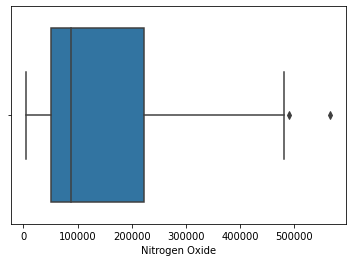

In [ ]:
sns.boxplot(df['Nitrogen Oxide'])

In [ ]:
y = df['Country']
X = df.drop(['Country'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()

In [ ]:
cls.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = cls.predict(x_test)
y_pred

array(['Afghanistan', 'Afghanistan', 'Zimbabwe', 'Afghanistan',
       'Afghanistan', 'Afghanistan', 'Zimbabwe', 'Afghanistan',
       'Zimbabwe', 'Afghanistan', 'Zimbabwe', 'Afghanistan', 'Zimbabwe',
       'Zimbabwe', 'Afghanistan', 'Zimbabwe', 'Zimbabwe', 'Afghanistan',
       'Afghanistan', 'Afghanistan', 'Afghanistan', 'Zimbabwe',
       'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan',
       'Zimbabwe', 'Afghanistan'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[18  0]
 [ 0 10]]
              precision    recall  f1-score   support

 Afghanistan       1.00      1.00      1.00        18
    Zimbabwe       1.00      1.00      1.00        10

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [ ]:
from sklearn.svm import SVC
cll = SVC(kernel='linear', random_state=True)
cll.fit(x_train, y_train)

SVC(kernel='linear', random_state=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[18  0]
 [ 0 10]]
              precision    recall  f1-score   support

 Afghanistan       1.00      1.00      1.00        18
    Zimbabwe       1.00      1.00      1.00        10

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28

